<a href="https://colab.research.google.com/github/guilhermecchacur/estudo_covid19/blob/main/Estudo_de_caso_da_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#**Fonde de Dados**

Os dados vem de uma fonte open source disponibilizada no GitHub. Aparenta ser uma fonte bem extensa com dados do mundo inteiro e diversas variáveis. É um compilado de diversas origens de dados, e por se tratar de uma doença nova com vários pontos ainda desconhecidos pode haver alguma discondaância entre os dados apresentados por cada país. 

In [2]:
data = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

#**Dicionário de Variáveis**



In [3]:
var = pd.read_csv(r'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv', sep = ',')
var[0:63]


,column,source,category,description
0,iso_code,International Organization for Standardization,Others,ISO 3166-1 alpha-3 – three-letter country codes
1,continent,Our World in Data,Others,Continent of the geographical location
2,location,Our World in Data,Others,Geographical location
3,date,Our World in Data,Others,Date of observation
4,total_cases,COVID-19 Data Repository by the Center for Sys...,Confirmed cases,Total confirmed cases of COVID-19
...,...,...,...,...
58,hospital_beds_per_thousand,"OECD, Eurostat, World Bank, national governmen...",Others,"Hospital beds per 1,000 people, most recent ye..."
59,life_expectancy,"James C. Riley, Clio Infra, United Nations Pop...",Others,Life expectancy at birth in 2019
60,human_development_index,United Nations Development Programme (UNDP),Others,A composite index measuring average achievemen...
61,excess_mortality,"Human Mortality Database (2021), World Mortali...",Excess mortality,Percentage difference between the reported num...


#**Análise Exploratória - Mundo**

##**Conhecendo o Dataset**


In [4]:
#Importando os dados para um DaataFrame
df = pd.read_csv(data, sep = ',')

In [5]:
#Exibindo as primeiras entradas e o tamanho do df
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,0.0,0.126,0.000,0.018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,0.0,0.126,0.000,0.018,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,0.0,0.126,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,0.0,0.126,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
#Imprimindo o tamanho do dataframe
df.shape

(121744, 65)

In [7]:
#Exibindo as colunas e tipo de dados de cada uma 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121744 entries, 0 to 121743
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 121744 non-null  object 
 1   continent                                116202 non-null  object 
 2   location                                 121744 non-null  object 
 3   date                                     121744 non-null  object 
 4   total_cases                              115518 non-null  float64
 5   new_cases                                115515 non-null  float64
 6   new_cases_smoothed                       114500 non-null  float64
 7   total_deaths                             104708 non-null  float64
 8   new_deaths                               104863 non-null  float64
 9   new_deaths_smoothed                      114500 non-null  float64
 10  total_cases_per_million         

In [8]:
#Checando a quantidade de valores nulos e quais colunas possuem mais valores assim
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending = False)[0:40]

weekly_icu_admissions                      98.958470
weekly_icu_admissions_per_million          98.958470
weekly_hosp_admissions_per_million         98.284926
weekly_hosp_admissions                     98.284926
total_boosters                             97.488993
total_boosters_per_hundred                 97.488993
excess_mortality                           96.454035
excess_mortality_cumulative_per_million    96.454035
excess_mortality_cumulative                96.454035
excess_mortality_cumulative_absolute       96.454035
icu_patients_per_million                   88.136582
icu_patients                               88.136582
hosp_patients_per_million                  86.443685
hosp_patients                              86.443685
new_vaccinations                           80.863123
people_fully_vaccinated                    80.521422
people_fully_vaccinated_per_hundred        80.521422
people_vaccinated_per_hundred              78.030950
people_vaccinated                          78.

Podemos ver que se trata de uma dataset bem extenso com uma rica quantidade de variáveis. Desde de informações sobre o avanço da Covid-19 no país, até informações sociais e demográficas, sendo possivel analisar possíveis relações entre esse fatores. Infelizmente há algumas variáveis que possuem quase 100% de seus dados nulos, um fator pode ser a liberação dessas informações pelos paises, por se traterem de infomrações delicadas ou até mesmo o pais não possui esses dados internamente. Outro possível fator é a questão da vacinção, que só começou a acontecer de forma massiva mais recentemente. 

In [9]:
#Transformando a variável date em formato de data
df.date = pd.to_datetime(df.date)

##**Retirando algumas informações do Dataset**

In [10]:
#Verificando a data mais atual do datafram 
max_date = df.date.max()

#Exibindo os 30 paises com mais casos 
df.loc[(df.date == max_date) & (df.continent.notnull()), ['location', 'continent', 'total_cases', 'total_deaths']].sort_values(by = 'total_cases', ascending = False)[0:30]


,location,continent,total_cases,total_deaths
115993,United States,North America,44058827.0,707781.0
50981,India,Asia,33894312.0,449856.0
16112,Brazil,South America,21516967.0,599359.0
115369,United Kingdom,Europe,8044424.0,137694.0
91003,Russia,Europe,7548944.0,208842.0
112600,Turkey,Asia,7327317.0,65373.0
40016,France,Europe,7137568.0,117801.0
52769,Iran,Asia,5662458.0,121779.0
4980,Argentina,South America,5263219.0,115379.0
103600,Spain,Europe,4969503.0,86678.0


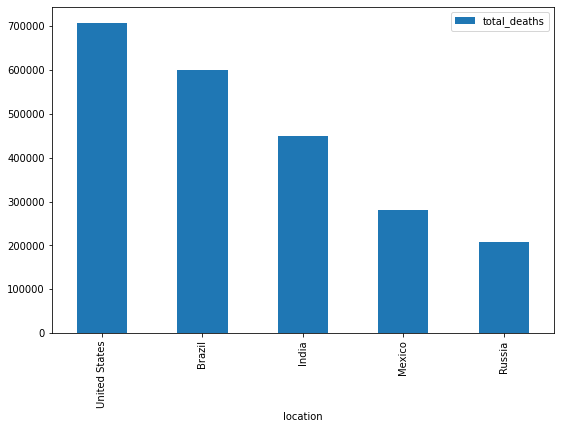

In [11]:
#Plotando um gráfico dos páises com mais mortes
fig, ax = plt.subplots(figsize=(9,6))
bar = df.loc[(df.date == max_date) & (df.continent.notnull()), ['location', 'continent', 'total_cases', 'total_deaths']].sort_values(by = 'total_deaths', ascending = False)[0:5]

bar.plot(x = 'location', y = 'total_deaths', kind = 'bar', ax = ax)

Text(0.5, 1.0, 'Mortes Confirmadas no Mundo')

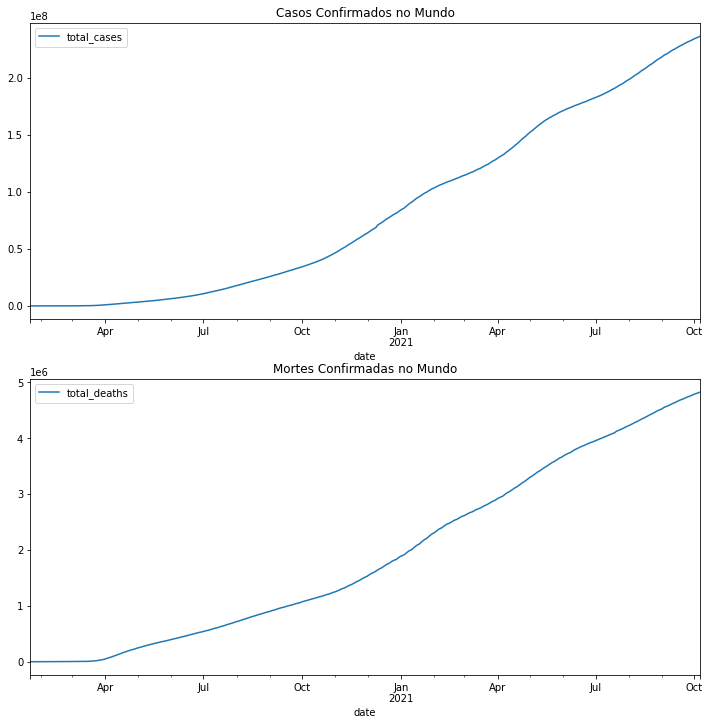

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1,figsize=(12,12))
line = df.loc[df.location == 'World', ['total_cases', 'total_deaths', 'date']].reset_index(drop=True)
line.plot('date', 'total_cases', ax = ax1)
line.plot('date', 'total_deaths', ax = ax2)

ax1.set_title("Casos Confirmados no Mundo")
ax2.set_title("Mortes Confirmadas no Mundo")


In [13]:
a = df.loc[((df.location == 'United States') | (df.location == 'India') | (df.location == 'Brazil')) & (df.date == max_date), 'total_cases'].sum() / df.loc[(df.location == 'World') & (df.date == max_date), 'total_cases'].sum()
b = df.loc[((df.location == 'United States') | (df.location == 'India') | (df.location == 'Brazil')) & (df.date == max_date), 'total_deaths'].sum() / df.loc[(df.location == 'World') & (df.date == max_date), 'total_deaths'].sum()
print(f'Representatividade de casos do EUA, Índia e Brasil no mundo: {(a*100):.2F}%')
print(f'Representatividade de mortes do EUA, Índia e Brasil no mundo: {(b*100):.2F}%')

Representatividade de casos do EUA, Índia e Brasil no mundo: 42.09%
Representatividade de mortes do EUA, Índia e Brasil no mundo: 36.41%


**Estados Unidos, Índia e Brasil** ocupam as três primeiras posições em número de mortes e casos confirmados. E representam quase **metade dos casos mundiais** e mais de **um terço das mortes mundiais**. Apesar desses três paises terem uma grnade particiapação no volume de casos e mortes, por se tratar de uma doença altamente contagiosa, **todo país e foco de contágio deve ser tratado com a igualmente sério**. 


Text(0, 0.5, 'Mortes')

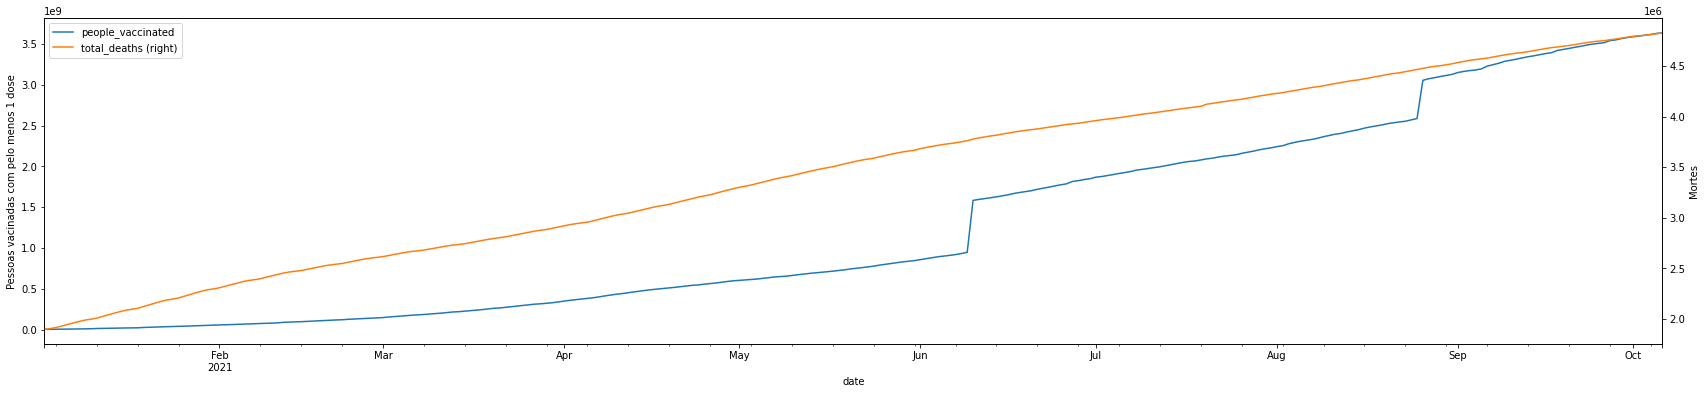

In [14]:
fig, ax = plt.subplots(figsize=(29,6))

df.people_vaccinated.fillna(0)

df.loc[(df.location == 'World') & (df.date > '2021-01-01'),['people_vaccinated', 'date', 'total_deaths']].reset_index(drop = True).plot('date','people_vaccinated', ax = ax, ylabel = 'Pessoas vacinadas com pelo menos 1 dose')
df.loc[(df.location == 'World') & (df.date > '2021-01-01'),['people_vaccinated', 'date', 'total_deaths']].reset_index(drop = True).plot('date','total_deaths', ax = ax, secondary_y=True).set_ylabel('Mortes')



Apesar de estarmos perto de 4 bolhoes de pessoas vacinadas com apenas uma dose, em dimensões globais, ainda não vemos uma significante redução de desacelerada do número de mortos totais. Talvez fique mais visivel na quantidade de mortos diários, quando olhado somente para o país.

#**Análise Exploratória - Brasil**

In [15]:
#Criando um Dataframe separado somente para o Brasil
df_b = df.loc[df.location == "Brazil"].copy()

In [16]:
#Primro caso do Brasil
data_caso = df_b.date.iloc[0]
print(f"Data do primeiro caso registrado no Brasil: {data_caso.strftime('%d/%m/%Y')}")

Data do primeiro caso registrado no Brasil: 26/02/2020


In [17]:
#Dias até a primeira morte desde o primeiro caso 
data_morte = df_b.loc[df_b.new_deaths.isna() == False, 'date'].iloc[0]
data_morte - data_caso

Timedelta('20 days 00:00:00')

Text(0.5, 1.0, 'Mortes')

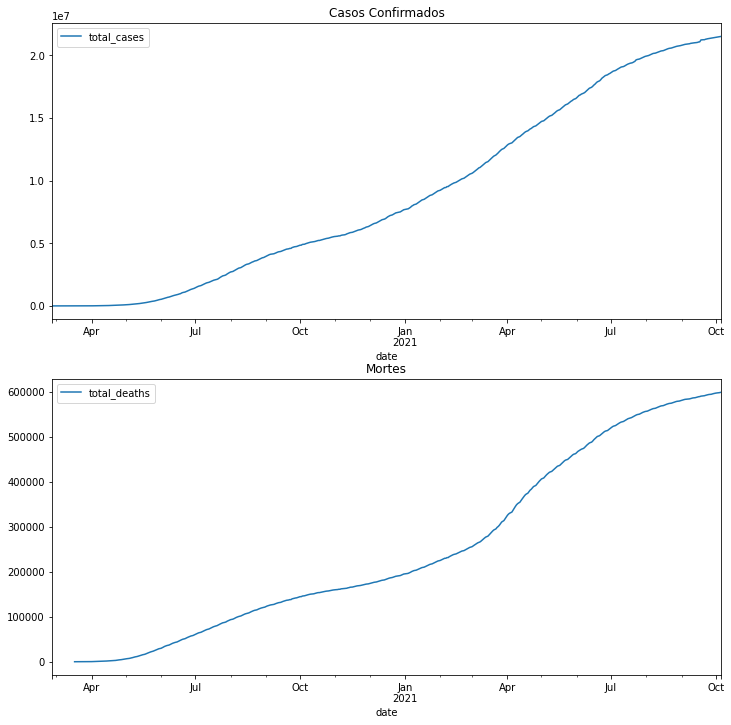

In [18]:
#Gráfico de casos e mortes no Brasil
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1,figsize=(12,12))

df_b.plot(x = 'date', y = 'total_cases', ax = ax1)
df_b.plot(x = 'date', y = 'total_deaths', ax = ax2)

ax1.set_title('Casos Confirmados')
ax2.set_title('Mortes')

Text(0.5, 1.0, 'Mortes')

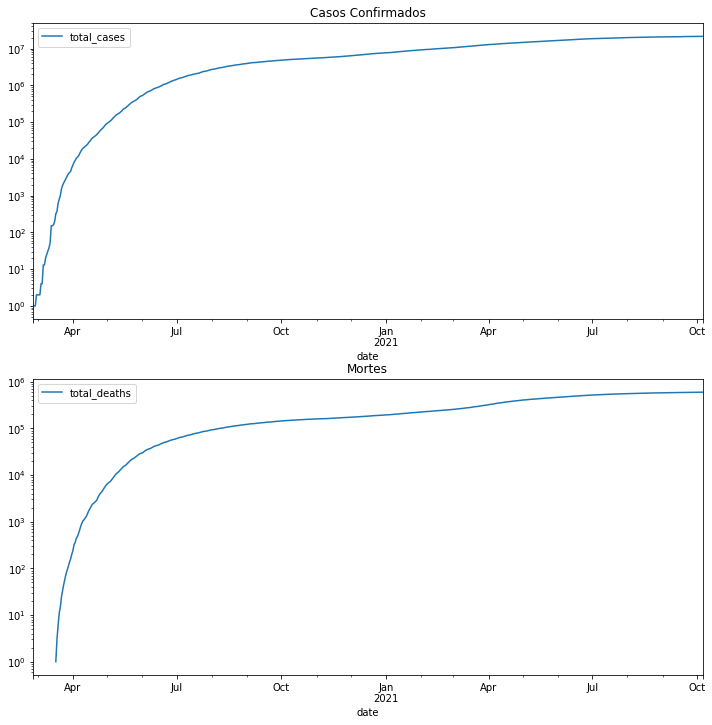

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1,figsize=(12,12))

df_b.plot(x = 'date', y = 'total_cases', ax = ax1, logy = True)
df_b.plot(x = 'date', y = 'total_deaths', ax = ax2, logy = True)

ax1.set_title('Casos Confirmados')
ax2.set_title('Mortes')

#**Conclusão**

A COVID-19 é uma doença devastadora, visto pelos números de casos e mortes, em pouco tempo de pandemia. Hoje, temos 3 países que concetram quase metade dos casos mundiais e mais de um terço das mortes mundiais, fazendo deles um grnade polo de contágio e surgimento de novas variantes. As vacinas, por outro lado, estão fazendo a diferença na mudança da situação, principalmente quando analisado país por país, como visto no Brasil que a quantidade de mortes totais tem se estabilizado conforme a população é vacinada. 
Há outras variáveis que poderiam ter sido correlacionadas e comparadas o impactos das mesmas sobre as outras, mas se tratando de um estudo, foi concetrado a analise nas mais evidentes e no aprendizado da excução.
